In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import random

In [2]:
df = pd.read_csv ('./renpho_data_09222022.csv')
df = df[::-1]
df

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks,Day
77,"07/06/2022, 07:30:00",324.8,41.7,--,--,--,--,--,--,--,--,--,--,--,--,1
76,"07/07/2022, 07:53:50",322.6,41.4,--,--,--,--,--,--,--,--,--,--,--,--,2
75,"07/08/2022, 07:43:33",322.0,41.3,--,--,--,--,--,--,--,--,--,--,--,--,3
74,"07/09/2022, 11:03:08",323.0,41.4,--,--,--,--,--,--,--,--,--,--,--,--,4
73,"07/10/2022, 13:17:02",321.4,41.3,--,--,--,--,--,--,--,--,--,--,--,--,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,"09/18/2022, 10:38:18",263.4,33.8,20.1,210.4,15.9,16,57.7,51.6,200,10.6,18.2,2431,29,--,74
3,"09/19/2022, 09:10:04",262.6,33.7,20,210,15.9,16,57.7,51.7,199.6,10.4,18.2,2427,29,--,75
2,"09/20/2022, 08:45:42",262.0,33.6,20,209.6,15.8,16,57.8,51.7,199,10.4,18.2,2423,29,--,76
1,"09/21/2022, 08:45:28",261.4,33.6,19.9,209.4,15.8,16,57.8,51.7,198.8,10.4,18.3,2421,29,--,77


In [29]:
def getBestLineFit(xx, yy, axess, displayEqn):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    c = '#c99aff'
    axess.plot(x, a*x+b, color=c, linestyle='--', linewidth=2)
    if(displayEqn):
        axess.text(0.21, 0.97, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', color=c, 
                   size=20, horizontalalignment='center', verticalalignment='center', transform=axess.transAxes)

In [30]:
def labelPoints(inteval, x, y, axess):
    a = x.max() - x.min()
    b = y.max() - y.min()
    for i in reversed(range(a+1)):
        if(i % inteval == 0):
            axess.text(x[i]+0.006*a,y[i]+0.036*b,'Day ' + str(x[i]) + ': ' + '{:.2f}'.format(y[i]))

In [31]:
daysAfter40 = df['Day'][40:]
bodyFatData =  np.array([float(i) for i in df['Body Fat(%)'][40:]])

weight_interval = 15
BMI_interval = 2
bodyFact_interval = 1

displayEqn = True
labelProgress = True

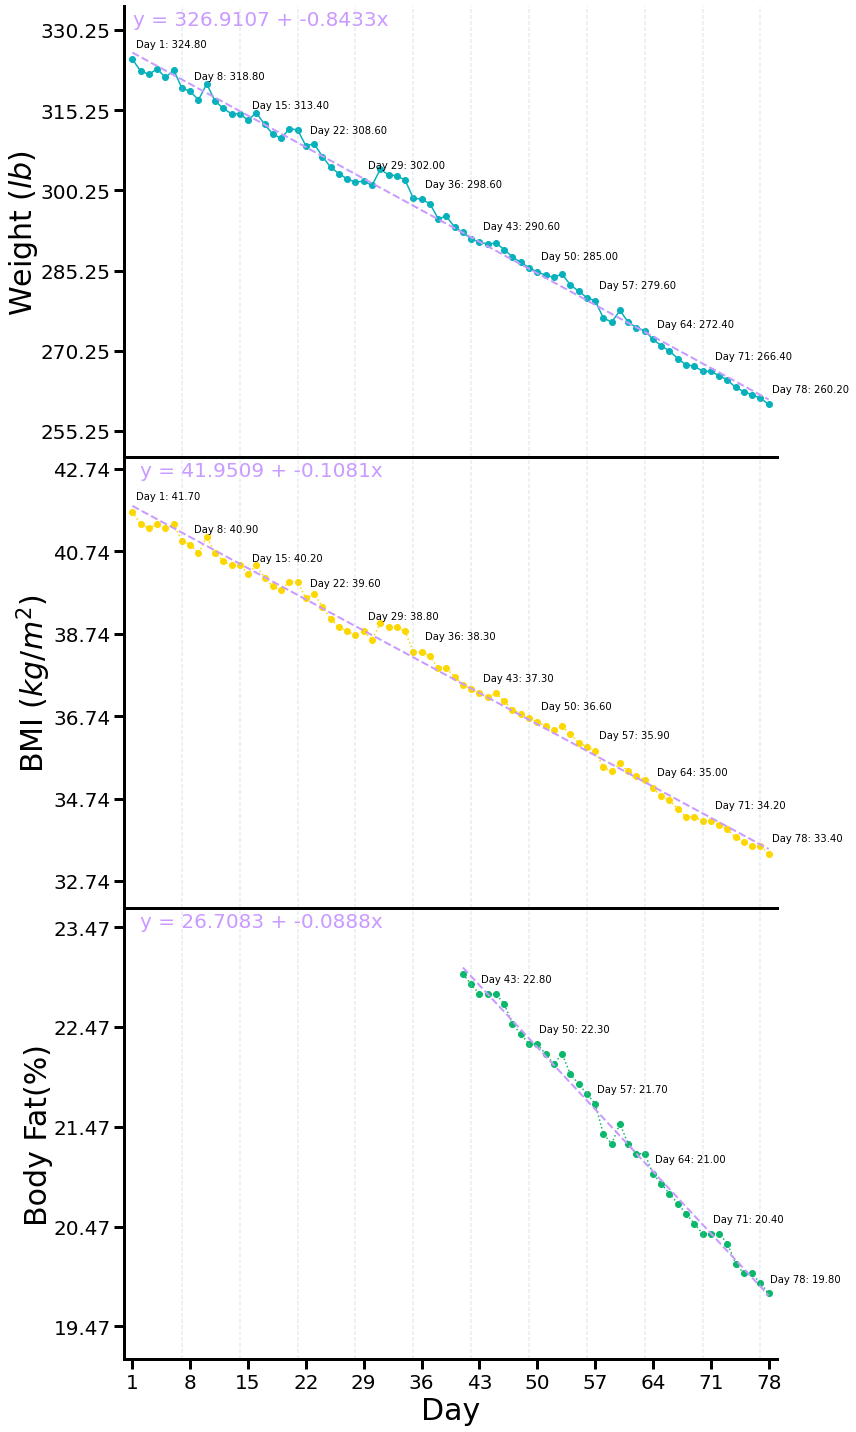

In [420]:
#%matplotlib qt
fig, ax = plt.subplots(3, 1,figsize =(12, 20), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)


ax[0].plot(df['Day'], df['Weight(lb)'], marker='o', linestyle = '-', color ='#07b1bc',  label ='Weight')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax[0].set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax[0].spines["left"].set_linewidth(3)
ax[0].spines["bottom"].set_linewidth(3)
ax[0].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
ax[0].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)
ax[0].set_ylabel('Weight ($lb$)',fontsize=30,labelpad = 0.4)
# Get best line fit 
getBestLineFit(df['Day'], df['Weight(lb)'], ax[0], displayEqn)
if (labelProgress): labelPoints(7, df['Day'],df['Weight(lb)'], ax[0])
    


ax[1].plot(df['Day'], df['BMI'], marker='o', linestyle = ':', color ='#fdd800')
ax[1].spines['right'].set_visible(False)
ax[1].spines["top"].set_linewidth(3)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_ylim(df['BMI'].min()-0.66*BMI_interval,df['BMI'].max()+0.66*BMI_interval)
ax[1].set_yticks(np.arange(df['BMI'].min()-0.33*BMI_interval,df['BMI'].max()+0.66*BMI_interval,BMI_interval))
ax[1].spines["left"].set_linewidth(3)
ax[1].spines["bottom"].set_linewidth(3)
ax[1].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
ax[1].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)
ax[1].set_ylabel('BMI ($kg/m^2$)',fontsize=30,labelpad = 0.4)
getBestLineFit(df['Day'], df['BMI'], ax[1], displayEqn)
if (labelProgress): labelPoints(7, df['Day'],df['BMI'], ax[1])
    
    
ax[2].plot(daysAfter40, bodyFatData, marker='o', linestyle = ':', color ='#0ab86b')
ax[2].spines['right'].set_visible(False)
ax[2].spines["top"].set_linewidth(3)
ax[2].tick_params(axis='y', labelsize=20)
ax[2].set_ylim(bodyFatData.min()-0.66*bodyFact_interval, bodyFatData.max()+0.66*bodyFact_interval)
ax[2].set_yticks(np.arange(bodyFatData.min()-0.33*bodyFact_interval,bodyFatData.max()+0.66*bodyFact_interval,bodyFact_interval))
ax[2].spines["left"].set_linewidth(3)
ax[2].spines["bottom"].set_linewidth(3)
ax[2].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
ax[2].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)
ax[2].set_ylabel('Body Fat(%)',fontsize=30,labelpad = 0.4)
getBestLineFit(daysAfter40, bodyFatData, ax[2], displayEqn)
if (labelProgress): labelPoints(7, daysAfter40, np.flip(bodyFatData), ax[2])

ax[2].tick_params(axis='x', labelsize=20)
ax[2].set_xlim(0,df['Day'].max()+1)
ax[2].set_xticks(np.arange(1, df['Day'].max()+1,7))
ax[2].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
ax[2].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)

for i in range(3):
    for j in np.arange(0, df['Day'].max()+1,7):
        ax[i].axvline(x=j,linewidth=0.4, color='#a7b9d7', linestyle=(0, (10, 5)))
             
plt.xlabel("Day",fontsize=30)
#plt.savefig('09222022.pdf',dpi=3600)
plt.savefig('09222022.pdf',dpi=3600,bbox_inches="tight")
plt.show()


### Divide days into intevals and observe the change of the weight loss trend

In [127]:
def plotSegment(start, end, axess,c,showDataPoints=True, joinLine = False):
    x = df['Day'][start:end]
    y = df['Weight(lb)'][start:end]
    a, b = np.polyfit(x, y, 1)
    m = 'None' if (not showDataPoints) else 'o'
    l = 'None' if (not joinLine) else 'dotted'
    axess.plot(x, y, color=c, marker=m, ms = 4, linestyle=l)
    axess.plot(x, a*x+b, label='Day' + str(start+1) + '-' + str(end) + ': y='+'{:.4f}'.format(b)+'{:.4f}'.format(a)+'x',linestyle='--',color=c,lw=2)    

In [128]:
day_interval = 10

nums_segments = df['Day'].size // day_interval

hexadecimal_alphabets = '0123456789ABCDEF'

colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(nums_segments+1)]

In [134]:
showDataPoints = True
joinLine = False

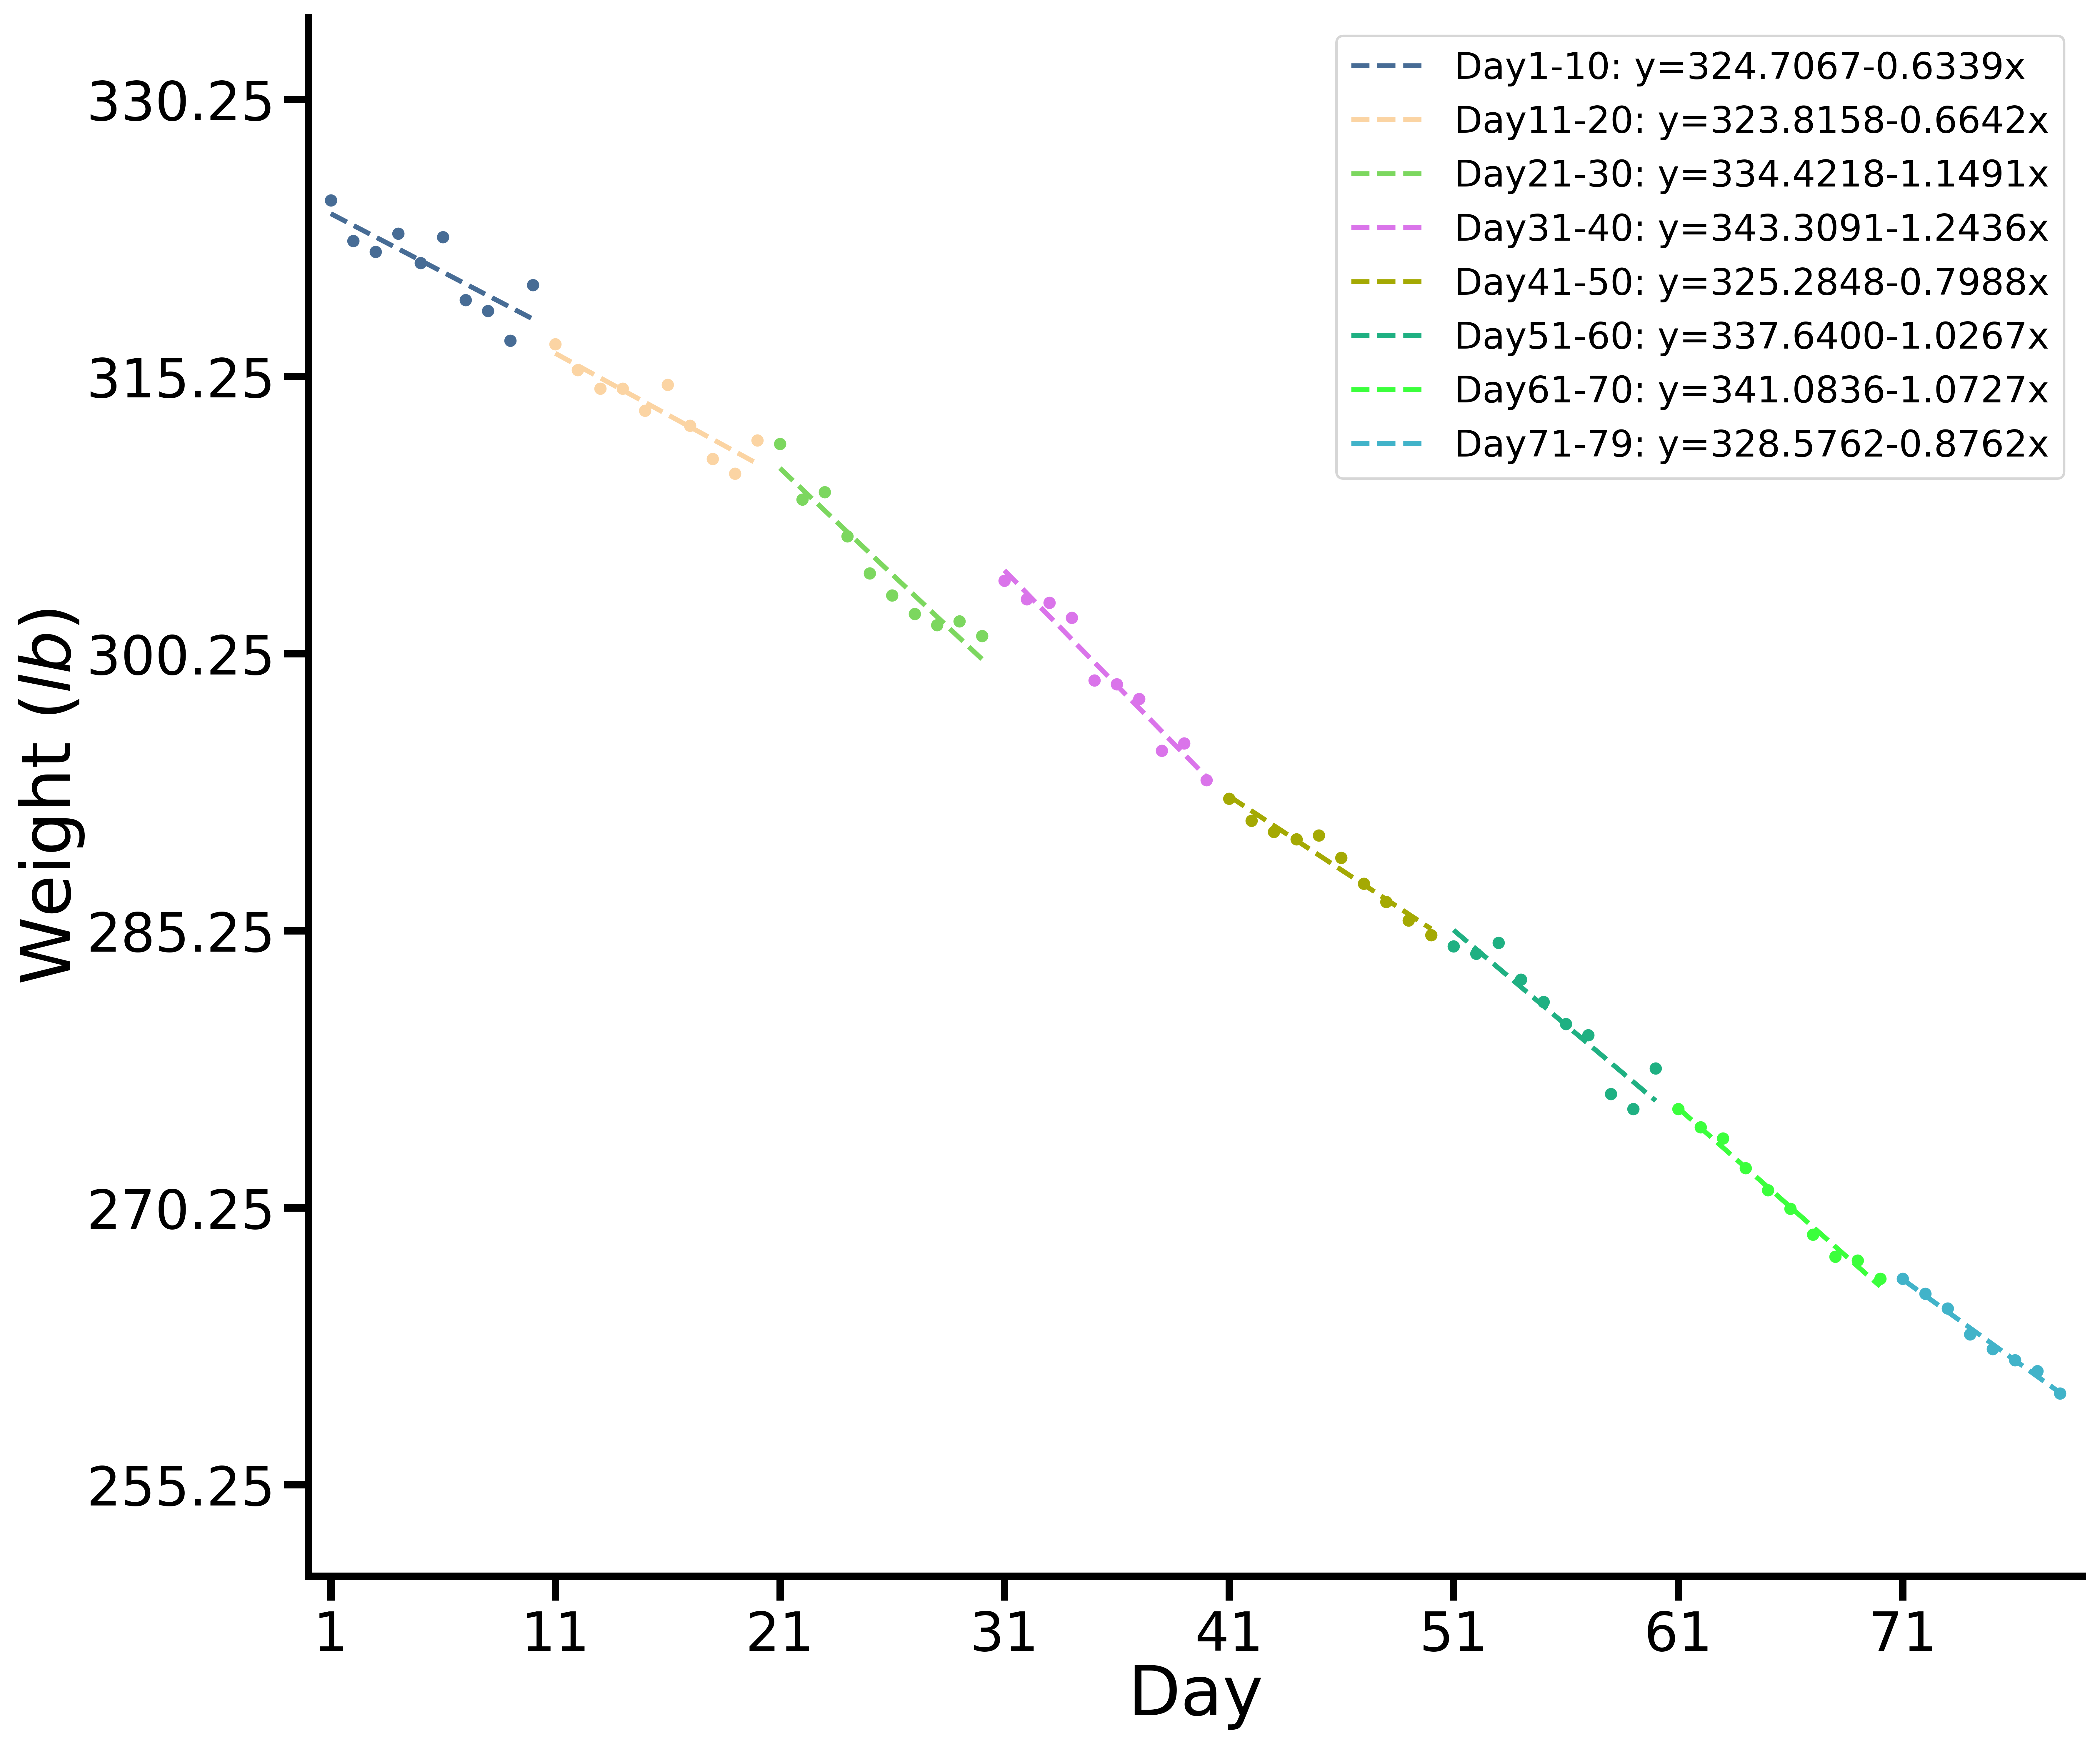

In [138]:
fig, ax1 = plt.subplots(figsize=(12,10), dpi=600)
gs = fig.add_gridspec(3, hspace=0)

for i in range(nums_segments):
    nexti = (i+1)* day_interval
    plotSegment(i*day_interval,nexti,ax1,colors[i], showDataPoints, joinLine )
plotSegment(nums_segments*day_interval, df['Day'].size+1, ax1, colors[-1], showDataPoints, joinLine)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines["left"].set_linewidth(3)
ax1.spines["bottom"].set_linewidth(3)

ax1.set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax1.set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax1.set_ylabel('Weight ($lb$)',fontsize=28,labelpad = 0.4)

ax1.set_xlim(0,df['Day'].max()+1)
ax1.set_xticks(np.arange(1, df['Day'].max()+1,day_interval))
ax1.set_xlabel('Day',fontsize=28,labelpad = 0.4)

ax1.tick_params(direction='out', axis ='y', which ='both', length=10, width=3,labelsize=22)
ax1.tick_params(direction='out', axis ='x', which ='both', length=10, width=3,labelsize=22)

plt.legend(fontsize=15)

plt.tight_layout()
plt.savefig('segmented_trend.pdf',dpi=3600,bbox_inches="tight")
